In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

In [7]:
df = pd.read_csv("atussum_18.csv")
drop_list = [ 'PEHSPNON',
              'TEMJOT',
              'TESCHENR',
              'TESCHLVL',
              'TUFNWGTP',
              'TU20FWGT']
df1 = df.drop(drop_list, axis=1)

In [8]:
def drop_dimensions(df_in):
    features = list(df_in.columns)
    # print(features)
    remove_list = ['TUCASEID', 'GEMETSTA', 'GTMETSTA', 'PEEDUCA', 'PTDTRACE', 'TEAGE', 'TELFS', 'TESEX', 'TESPEMPNOT', 'TRCHILDNUM', 'TRDPFTPT', 'TRERNWA', 'TRHOLIDAY', 'TRSPFTPT', 'TRSPPRES', 'TRYHHCHILD', 'TUDIARYDAY', 'TEHRUSLT', 'TUYEAR']
    for name in remove_list:
        features.remove(name)
    # print(features)
    df_out = df_in.drop(remove_list, axis=1)
    return df_out

def embedding(df, scale=True, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean'):
    umap_model=UMAP(
                    n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    n_components=n_components,
                    metric=metric
                    )
    df_features = drop_dimensions(df)
    
    if scale == True:
        df2 = StandardScaler().fit_transform(df_features)
    else: df2 = df_features
        
    out = umap_model.fit_transform(df2)
    return out

def plot(df, out, label='TELFS'):
    plt.figure(figsize=(4, 4))
    plt.scatter(out[:,0], out[:,1], c=df[label])
    plt.xlabel('dim1')
    plt.ylabel('dim2')

In [4]:
out = embedding(df1)

Text(0, 0.5, 'dim2')

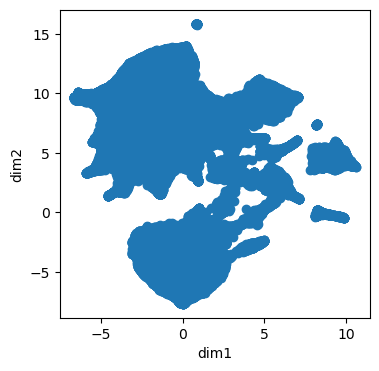

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(out[:,0], out[:,1])
plt.xlabel('dim1')
plt.ylabel('dim2')

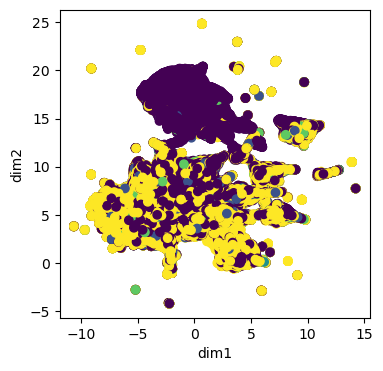

In [9]:
out = embedding(df1)
plot(df1, out, label='TELFS')

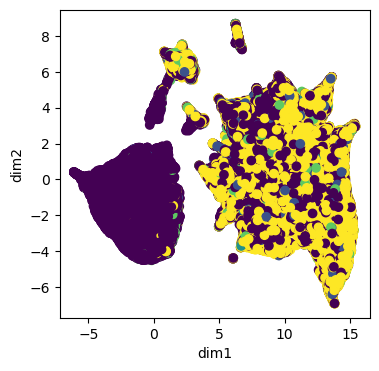

In [10]:
out_m = embedding(df1, metric='manhattan')
plot(df1, out_m, label='TELFS')

In [10]:
df_work=df1[df1['TELFS']==1]

In [11]:
out_work = embedding(df_work)

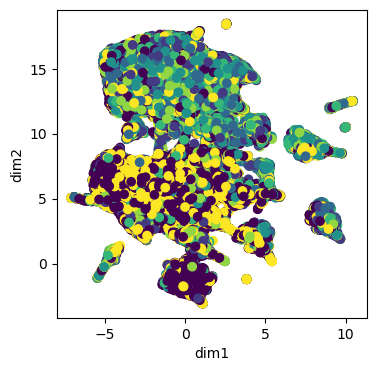

In [12]:
plot(df_work, out_work, label='TUDIARYDAY')

In [36]:
out_work_m = embedding(df_work, metric='manhattan')

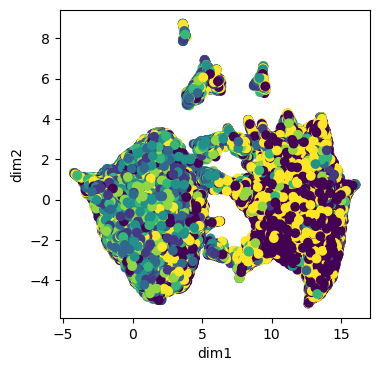

In [37]:
plot(df_work, out_work_m, label='TUDIARYDAY')

In [13]:
df_nowork=df1[df1['TELFS']!=1]

In [14]:
out_nowork = embedding(df_nowork)

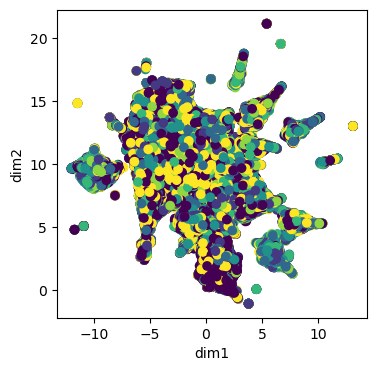

In [15]:
plot(df_nowork, out_nowork, label='TUDIARYDAY')

In [43]:
out_nowork_m = embedding(df_nowork, metric='manhattan')

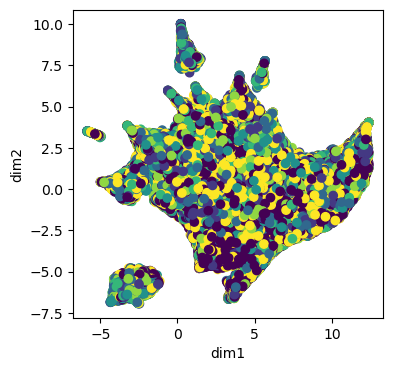

In [44]:
plot(df_nowork, out_nowork_m, label='TUDIARYDAY')

In [16]:
#save umap
df_umap_save = df.copy(deep=True)
df_umap_save['full_dim1']=out[:,0]
df_umap_save['full_dim2']=out[:,1]
# df_umap_save['full_manhattan_dim1']=out_m[:,0]
# df_umap_save['full_manhattan_dim2']=out_m[:,1]
df_umap_save.to_csv('ATUS_umap18_full.csv')

In [17]:
df_work_save = df_work.copy(deep=True)

df_work_save['work_dim1']=out_work[:,0]
df_work_save['work_dim2']=out_work[:,1]
# df_work_save['work_manhattan_dim1']=out_work_m[:,0]
# df_work_save['work_manhattan_dim2']=out_work_m[:,1]

df_work_save.to_csv('ATUS_umap18_work.csv')

In [18]:
df_nowork_save = df_nowork.copy(deep=True)

df_nowork_save['nowork_dim1']=out_nowork[:,0]
df_nowork_save['nowork_dim2']=out_nowork[:,1]
# df_nowork_save['nowork_manhattan_dim1']=out_nowork_m[:,0]
# df_nowork_save['nowork_manhattan_dim2']=out_nowork_m[:,1]

df_nowork_save.to_csv('ATUS_umap18_nowork.csv')

In [55]:
df_umap_save_work = df_work.copy(deep=True)
df_umap_save_work['work_dim1']=umap_work[:,0]
df_umap_save_work['work_dim2']=umap_work[:,1]

In [56]:
df_umap_save_work.to_csv('ATUS_umap_work.csv')

In [57]:
df_umap_save_nowork = df_nowork.copy(deep=True)
df_umap_save_nowork['nowork_dim1']=umap_nowork[:,0]
df_umap_save_nowork['nowork_dim2']=umap_nowork[:,1]

In [ ]:
list(df1.columns)

In [52]:
df_drop_1_5 = df1.drop(['t01','t05'], axis=1)

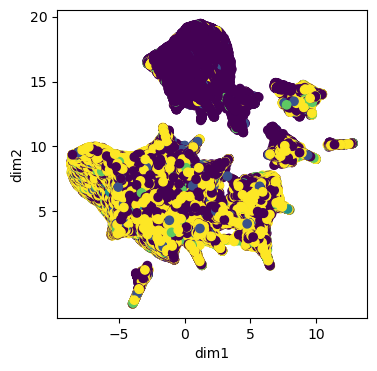

In [53]:
out_drop_1_5 = embedding(df_drop_1_5)
plot(df_drop_1_5, out_drop_1_5)

In [60]:
df_drop15_full_save = df1.copy(deep=True)
df_drop15_full_save['dim1'] = out_drop_1_5[:,0]
df_drop15_full_save['dim2'] = out_drop_1_5[:,1]
df_drop15_full_save.to_csv('ATUS_umap_drop15_full.csv')

In [55]:
df_work_drop_1_5 = df_work.drop(['t01','t05'], axis=1)

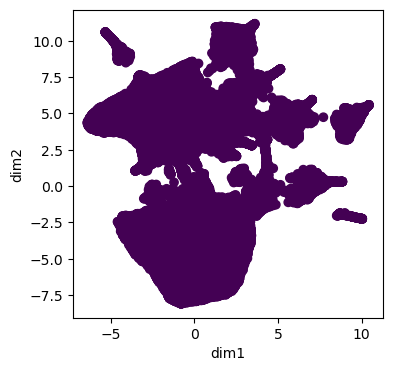

In [56]:
out_work_drop_1_5 = embedding(df_work_drop_1_5)
plot(df_work_drop_1_5, out_work_drop_1_5)

In [61]:
df_drop15_work_save = df_work.copy(deep=True)
df_drop15_work_save['dim1'] = out_work_drop_1_5[:,0]
df_drop15_work_save['dim2'] = out_work_drop_1_5[:,1]
df_drop15_work_save.to_csv('ATUS_umap_drop15_work.csv')

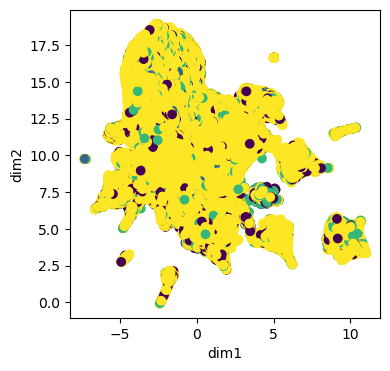

In [59]:
df_nowork_drop_1_5 = df_nowork.drop(['t01','t05'], axis=1)
out_nowork_drop_1_5 = embedding(df_nowork_drop_1_5)
plot(df_nowork_drop_1_5, out_nowork_drop_1_5)

In [62]:
df_drop15_nowork_save = df_nowork.copy(deep=True)
df_drop15_nowork_save['dim1'] = out_nowork_drop_1_5[:,0]
df_drop15_nowork_save['dim2'] = out_nowork_drop_1_5[:,1]
df_drop15_nowork_save.to_csv('ATUS_umap_drop15_nowork.csv')